In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv('train.csv')
pd.set_option("display.max_columns",81)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print("Shape "+str(data.shape))
print("Columns "+str(data.columns))
print("Info "+str(data.info))
print("Data Types "+str(data.dtypes))

Shape (1460, 81)
Columns Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       

In [ ]:
# dropping column "Id" as its serial number and cant infer
data.drop(labels='Id',axis=1,inplace=True)

In [ ]:
# missing values count
N_columns=[]
for i in data.columns:
    x=np.round(data[i].isnull().mean()*100,2)
    if x>50:
      print(i+' : ' + str(x)+ ' %')
    elif x>0:
      N_columns.append(i)

data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True) # Dropping columns which have missing values more than 80%
#print(N_columns)
len(N_columns)


Alley : 93.77 %
PoolQC : 99.52 %
Fence : 80.75 %
MiscFeature : 96.3 %


15

In [ ]:
#fill NAN values
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrType']=data['MasVnrType'].fillna('None')
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode().values[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode().values[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode().values[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode().values[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode().values[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode().values[0])
data['FireplaceQu']=data['FireplaceQu'].fillna('None')
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode().values[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode().values[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode().values[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode().values[0])

In [ ]:
# Handling Temporal Data
year=data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
year.corr() # Checking for time based data correlation
#Feature Engineering
data['YearBuilt_age']=data['YrSold']-data['YearBuilt'] #converting Year time interms of age of built data
data['YearRemodAdd_age']=data['YrSold']-data['YearRemodAdd'] #converting Remodling Year time interms of age of remodelling data
data.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)   #Dropping GarageYrBlt as highly correlated with  Year Built and other columns as converted to int variables

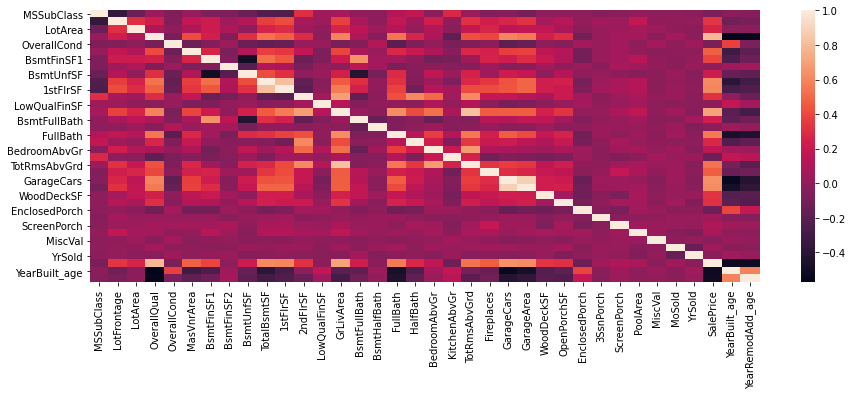

In [ ]:
 #Correlation between Variables with a Heat map
 cor1=pd.DataFrame(data.corr())
plt.figure(figsize=[15,5])
sns.heatmap(cor1,)

In [ ]:
#Classifying the features based data type
Numerical=[]
Categorical=[]
for i in data.columns:
  # if i not in year:
    if data[i].dtype=='O':
      Categorical.append(i)
    elif i =='YrSold':
      Categorical.append(i)
    elif data[i].dtype!='O':
      Numerical.append(i)

print(Numerical)
print('\n')
print(Categorical)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_age', 'YearRemodAdd_age']


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedD

#Test data

In [ ]:
# Loading Test data
test=pd.read_csv('test.csv')
test_id=test['Id'].values
test.drop(labels='Id',axis=1,inplace=True)
pd.set_option("display.max_columns",80)
print(test.head())
print(test.shape)

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1     

In [ ]:
# missing values count in Test data
N_columns_test=[]
for i in test.columns:
    x=np.round(test[i].isnull().mean()*100,2)
    if x>50:
      print(i+' : ' + str(x)+ ' %')
    elif x>0:
      N_columns_test.append(i)

test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True) # Dropping columns which have missing values more than 80%


Alley : 92.67 %
FireplaceQu : 50.03 %
PoolQC : 99.79 %
Fence : 80.12 %
MiscFeature : 96.5 %


In [ ]:
test['MSZoning']=test['MSZoning'].fillna(data['MSZoning'].mode().values[0])
test['LotFrontage']=test['LotFrontage'].fillna(data['LotFrontage'].mean())
test['Utilities']=test['Utilities'].fillna(data['Utilities'].mode().values[0])
test['Exterior1st']=test['Exterior1st'].fillna(data['Exterior1st'].mode().values[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(data['Exterior2nd'].mode().values[0])
test['MasVnrType']=test['MasVnrType'].fillna('None')
test['MasVnrArea']=test['MasVnrArea'].fillna(data['MasVnrArea'].mean())
test['BsmtQual']=test['BsmtQual'].fillna(data['BsmtQual'].mode().values[0])
test['BsmtCond']=test['BsmtCond'].fillna(data['BsmtCond'].mode().values[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(data['BsmtExposure'].mode().values[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(data['BsmtFinType1'].mode().values[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(data['BsmtFinType2'].mode().values[0])
test['Electrical']=test['Electrical'].fillna(data['Electrical'].mode().values[0])
test['FireplaceQu']=test['FireplaceQu'].fillna('None')
test['GarageType']=test['GarageType'].fillna(data['GarageType'].mode().values[0])
test['GarageFinish']=test['GarageFinish'].fillna(data['GarageFinish'].mode().values[0])
test['GarageQual']=test['GarageQual'].fillna(data['GarageQual'].mode().values[0])
test['GarageCond']=test['GarageCond'].fillna(data['GarageCond'].mode().values[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(data['BsmtFullBath'].mean())
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
test['KitchenQual']=test['KitchenQual'].fillna(data['KitchenQual'].mode().values[0])
test['Functional']=test['Functional'].fillna(data['Functional'].mode().values[0])
test['SaleType']=test['SaleType'].fillna(data['SaleType'].mode().values[0])
test['GarageCars']=test['GarageCars'].fillna(data['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(data['GarageArea'].mean())

In [ ]:
# Handling Temporal Data
year=test[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
year.corr() # Checking for time based data correlation
#Feature Engineering
test['YearBuilt_age']=test['YrSold']-test['YearBuilt'] #converting Year time interms of age of built data
test['YearRemodAdd_age']=test['YrSold']-test['YearRemodAdd'] #converting Remodling Year time interms of age of remodelling data
test.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)   #Dropping GarageYrBlt as highly correlated with  Year Built and other columns as converted to int variables

In [ ]:
#Classifying the features based data type
Numerical_t=[]
Categorical_t=[]
for i in test.columns:
  # if i not in year:
    if test[i].dtype=='O':
      Categorical_t.append(i)
    elif i =='YrSold':
      Categorical_t.append(i)
    elif test[i].dtype!='O':
      Numerical_t.append(i)

print(Numerical_t)
print('\n')
print(Categorical_t)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YearBuilt_age', 'YearRemodAdd_age']


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSol

#Categorical--Train data

In [ ]:
len(Categorical)

40

In [ ]:
Categorical_total=pd.concat([data[Categorical],test[Categorical_t]])

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[ ('cat', categorical_transformer, Categorical)])
preprocessor1=preprocessor.fit(Categorical_total)
preprocessor2=preprocessor1.transform(data[Categorical])
preprocessor2=preprocessor2.toarray()

column_cat=[]
for i in Categorical:
  for j in range(len(data[i].value_counts())):
    x=str(i)+'_'+str(j)
    column_cat.append(x)


Cat_encoder=pd.DataFrame(data=preprocessor2,columns=column_cat)
len(column_cat)

245

In [ ]:
cat_len=[]
for i in Categorical:
  cat_len.append(len(data[i].value_counts()))
  
cat_len=np.cumsum(cat_len)
print(cat_len)
drop_label=[]
for a in range(len(cat_len)):
  if a==0:
    sub=Cat_encoder.iloc[:,0:cat_len[a]]
    min=np.argmin(np.sum(sub,axis=0))
    indx=0+min
    lab=Cat_encoder.columns[indx]
  else:
    sub=Cat_encoder.iloc[:,cat_len[a-1]:cat_len[a]]
    min=np.argmin(np.sum(sub,axis=0))
    indx=cat_len[a-1]+min
    lab=Cat_encoder.columns[indx]
  drop_label.append(lab)
 
print(drop_label)

[  5   7  11  15  17  22  25  50  59  67  72  80  86  94 109 125 129 133
 138 144 148 152 156 162 168 174 179 181 186 190 197 203 209 212 217 222
 225 230 239 245]
['MSZoning_0', 'Street_0', 'LotShape_2', 'LandContour_2', 'Utilities_1', 'LotConfig_3', 'LandSlope_2', 'Neighborhood_1', 'Condition1_7', 'Condition2_3', 'BldgType_1', 'HouseStyle_3', 'RoofStyle_5', 'RoofMatl_0', 'Exterior1st_1', 'Exterior2nd_4', 'MasVnrType_0', 'ExterQual_1', 'ExterCond_3', 'Foundation_5', 'BsmtQual_1', 'BsmtCond_2', 'BsmtExposure_2', 'BsmtFinType1_3', 'BsmtFinType2_2', 'Heating_0', 'HeatingQC_3', 'CentralAir_0', 'Electrical_3', 'KitchenQual_1', 'Functional_5', 'FireplaceQu_4', 'GarageType_0', 'GarageFinish_0', 'GarageQual_0', 'GarageCond_0', 'PavedDrive_1', 'YrSold_4', 'SaleType_2', 'SaleCondition_1']


In [ ]:
Cat_encoder.drop(labels=drop_label,axis=1,inplace=True)
#Cat_encoder


#Categorical--Test data


In [ ]:
preprocessor3=preprocessor1.transform(test[Categorical_t])
preprocessor3=preprocessor3.toarray()

column_cat1=[]
for i in Categorical_t:
  for j in range(len(test[i].value_counts())):
    
    x=str(i)+'_'+str(j)
    column_cat1.append(x)

len(column_cat1)
Cat_encoder_t=pd.DataFrame(data=preprocessor3,columns=column_cat)


In [ ]:
cat_len=[]
for i in Categorical_t:
  cat_len.append(len(test[i].value_counts()))
  
cat_len=np.cumsum(cat_len)
print(cat_len)
drop_label=[]
for a in range(len(cat_len)):
  if a==0:
    sub=Cat_encoder_t.iloc[:,0:cat_len[a]]
    min=np.argmin(np.sum(sub,axis=0))
    indx=0+min
    lab=Cat_encoder_t.columns[indx]
  else:
    sub=Cat_encoder_t.iloc[:,cat_len[a-1]:cat_len[a]]
    min=np.argmin(np.sum(sub,axis=0))
    indx=cat_len[a-1]+min
    lab=Cat_encoder_t.columns[indx]
  drop_label.append(lab)
 
print(drop_label)

[  5   7  11  15  16  21  24  49  58  63  68  75  81  85  98 113 117 121
 126 132 136 140 144 150 156 160 165 167 171 175 182 188 194 197 201 206
 209 214 223 229]
['MSZoning_2', 'Street_0', 'LotShape_2', 'LandContour_2', 'Utilities_0', 'Utilities_1', 'LandSlope_1', 'LandSlope_2', 'Condition1_7', 'Condition2_0', 'Condition2_5', 'HouseStyle_1', 'HouseStyle_3', 'RoofStyle_4', 'RoofMatl_0', 'Exterior1st_7', 'Exterior2nd_4', 'Exterior2nd_9', 'MasVnrType_0', 'ExterQual_1', 'ExterCond_0', 'ExterCond_3', 'Foundation_5', 'BsmtQual_1', 'BsmtCond_2', 'BsmtFinType1_3', 'BsmtFinType2_2', 'BsmtFinType2_3', 'Heating_0', 'Heating_4', 'HeatingQC_3', 'Electrical_3', 'Functional_1', 'Functional_5', 'FireplaceQu_0', 'GarageType_0', 'GarageType_4', 'GarageQual_0', 'GarageCond_0', 'PavedDrive_1']


In [ ]:
Cat_encoder_t.drop(labels=drop_label,axis=1,inplace=True)
#Cat_encoder_t


#Numerical--Train Data

In [ ]:
cor2=data1[Numerical].corr()
#cor2
# Checking for multicolliearity
sub_ = cor2[abs(cor2)>0.7][abs(cor2)<1]
cols = sub_.columns
for i in cols:
  print(i)
  sub__ = sub_[i]
  sub__ = sub__.dropna()
  print(sub__)
  print('---------------------------------------------------------------------------------------------------')#'SalePrice','TotalBsmtSF','GarageArea'

In [ ]:
# Removing Columns as they have multicollinearity with other variables
data_num=data[Numerical].drop(labels=['TotalBsmtSF','TotRmsAbvGrd','GarageCars','1stFlrSF','SalePrice'],axis=1)
Y=data['SalePrice']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(data_num)

In [ ]:
#Checking Variance Inflation Factor for only Numerical variables
cols=data_num.columns
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(data_num.shape[1])]
vif["Features"] = cols

In [ ]:
vif

,VIF,Features
0,1.634015,MSSubClass
1,1.566428,LotFrontage
2,1.251718,LotArea
3,3.186796,OverallQual
4,1.558270,OverallCond
5,1.394471,MasVnrArea
6,5.391714,BsmtFinSF1
7,1.557379,BsmtFinSF2
8,4.137151,BsmtUnfSF
9,6.554569,2ndFlrSF


In [ ]:
#Concatinating both Numerical and Categorical variables
X_scaled=pd.DataFrame(X_scaled,columns=data_num.columns)
X=pd.concat([X_scaled,Cat_encoder],axis=1)

In [ ]:
cols=X.columns
#Checking Variance Inflation Factor for both Numerical and Categorical variables
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = cols

pd.set_option("display.max_rows",237)
vif

,VIF,Features
0,34.444315,MSSubClass
1,2.531228,LotFrontage
2,3.329059,LotArea
3,5.495447,OverallQual
4,2.623331,OverallCond
5,3.041022,MasVnrArea
6,12.623730,BsmtFinSF1
7,5.344981,BsmtFinSF2
8,8.696470,BsmtUnfSF
9,24.241341,2ndFlrSF


#Numerical--Test Data

In [ ]:
#Numerical
test_num=test[Numerical_t].drop(labels=['TotalBsmtSF','TotRmsAbvGrd','GarageCars','1stFlrSF'],axis=1)

X_test_scaled=scaler.transform(test_num)

X_test_scaled=pd.DataFrame(X_test_scaled,columns=test_num.columns)
X_test=pd.concat([X_test_scaled,Cat_encoder_t],axis=1)

In [ ]:
X_test.shape

(1459, 235)

#Modelling(Linear Regression)- Train Data

In [ ]:
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_p=LR.predict(X)
Y_p

array([206880., 204480., 207456., ..., 280352., 142496., 150560.])

In [ ]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
ridgecv = RidgeCV(alphas = alphas,cv=6,normalize = True)
ridgecv.fit(X,Y)

RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
        cv=6, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [ ]:
ridgecv.alpha_

1.0

In [ ]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
Y_predict=ridge_model.predict(X)

In [ ]:
np.sqrt(mean_squared_error(np.log(Y),np.log(Y_predict)))

0.12230753675220159

#Modelling(Linear Regression)- Test Data

In [ ]:
X_test.shape

(1459, 235)

In [ ]:
Y_test_pred=ridge_model.predict(X_test)

In [ ]:
Y_test_pred

array([111667.70991337, 139889.76016003, 111743.94777345, ...,
       145332.63714009,  92990.71198571, 176001.97201879])

In [ ]:
Test_Saleprice=pd.DataFrame()
Test_Saleprice['Id']=test_id
Test_Saleprice['SalePrice']=Y_test_pred

In [ ]:
Test_Saleprice

,Id,SalePrice
0,1461,111667.709913
1,1462,139889.760160
2,1463,111743.947773
3,1464,153500.261485
4,1465,195393.288596
...,...,...
1454,2915,66116.418216
1455,2916,85581.184463
1456,2917,145332.637140
1457,2918,92990.711986


In [ ]:
Test_Saleprice.to_csv('Test_Saleprice.csv',index=False)